In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_fscore_support

In [5]:
data = pd.read_csv("../data/loans_sample.csv", sep = "^")

In [6]:
data.head()

,funded_amnt_inv,term,issue_d,installment,int_rate,grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,total_rec_late_fee,application_type,total_acc,loan_status
0,25000.0,36 months,Jan-2015,777.55,7.49%,A,Senior Quality Engineer,10+ years,106157.0,Debt consolidation,9.37,MORTGAGE,922xx,CA,0.00,Individual,49.0,0
1,12000.0,36 months,May-2014,404.27,12.99%,C,service manager,7 years,67000.0,Debt consolidation,21.33,MORTGAGE,315xx,GA,0.00,Individual,28.0,1
2,4800.0,36 months,Aug-2013,175.59,18.85%,D,LAVO,3 years,56000.0,Consolidate,7.62,RENT,900xx,CA,0.00,Individual,15.0,0
3,7900.0,36 months,Oct-2014,273.82,14.99%,C,security guard,1 year,58300.0,Debt consolidation,12.15,MORTGAGE,775xx,TX,0.00,Individual,17.0,0
4,10725.0,36 months,Jul-2014,385.43,17.57%,D,Teacher,1 year,36000.0,Debt consolidation,21.68,RENT,361xx,AL,19.27,Individual,18.0,0


__Train / Test split:__

In [214]:
X = data_for_modeling.loc[:, data_for_modeling.columns!='loan_status']

In [215]:
y = data_for_modeling['loan_status']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

__Prior__:

In [217]:
y.value_counts()[0] / len(y)

0.7877560230151486

__Random Forest__:

In [218]:
random_forest = RandomForestClassifier()

In [219]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature importance:

Text(0.5,1,'Feature importance')

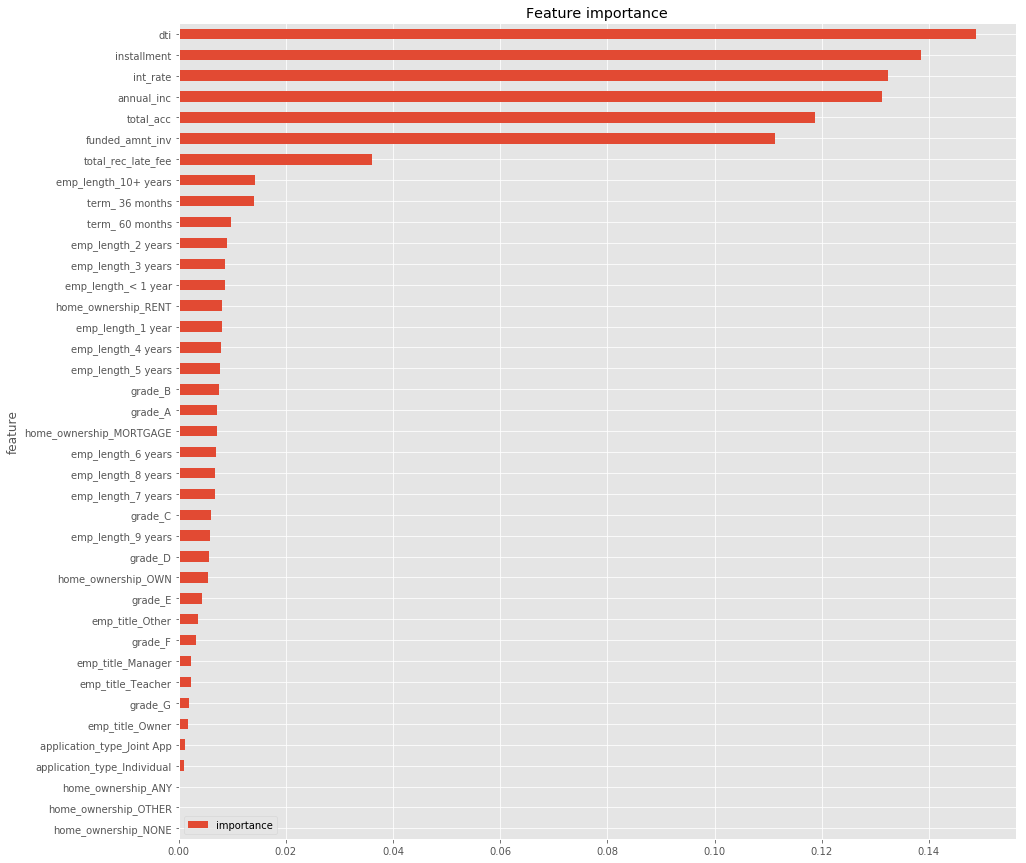

In [220]:
features = pd.DataFrame({'feature':X_train.columns,
                         'importance':random_forest.feature_importances_})

features = features.set_index('feature').sort_values('importance', ascending=True)

features.plot(kind='barh',figsize=(15,15)).set_title('Feature importance')

__Model Evaluation__

AUC in the train set:

In [239]:
y_scores_train = random_forest.predict_proba(X_train)

y_scores_train = pd.DataFrame(y_scores_train).loc[:,1]

In [240]:
roc_auc_score(y_train, y_scores_train)

0.9991606806303257

ROC Curve:

In [235]:
y_scores = random_forest.predict_proba(X_test)

y_scores = pd.DataFrame(y_scores).loc[:,1]

In [236]:
fpr, tpr, _ = roc_curve(y_test, y_scores)

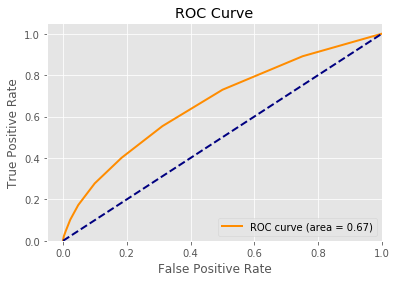

In [237]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

AUC:

In [227]:
roc_auc_score(y_test, y_scores)

0.6655940373156943

Confusion Matrix

In [228]:
y_predictions = random_forest.predict(X_test)

In [229]:
confusion_matrix(y_test, y_predictions)

array([[14689,   737],
       [ 3371,   704]])

In [238]:
(14689+704)/(14689+704+3371+737)

0.7893441361981437

Recall:

In [241]:
precision_recall_fscore_support(y_test, y_predictions) [0]

array([0.81334441, 0.48854962])

Precision:

In [242]:
precision_recall_fscore_support(y_test, y_predictions) [1]

array([0.95222352, 0.17276074])